# Tracé en fonction du mois

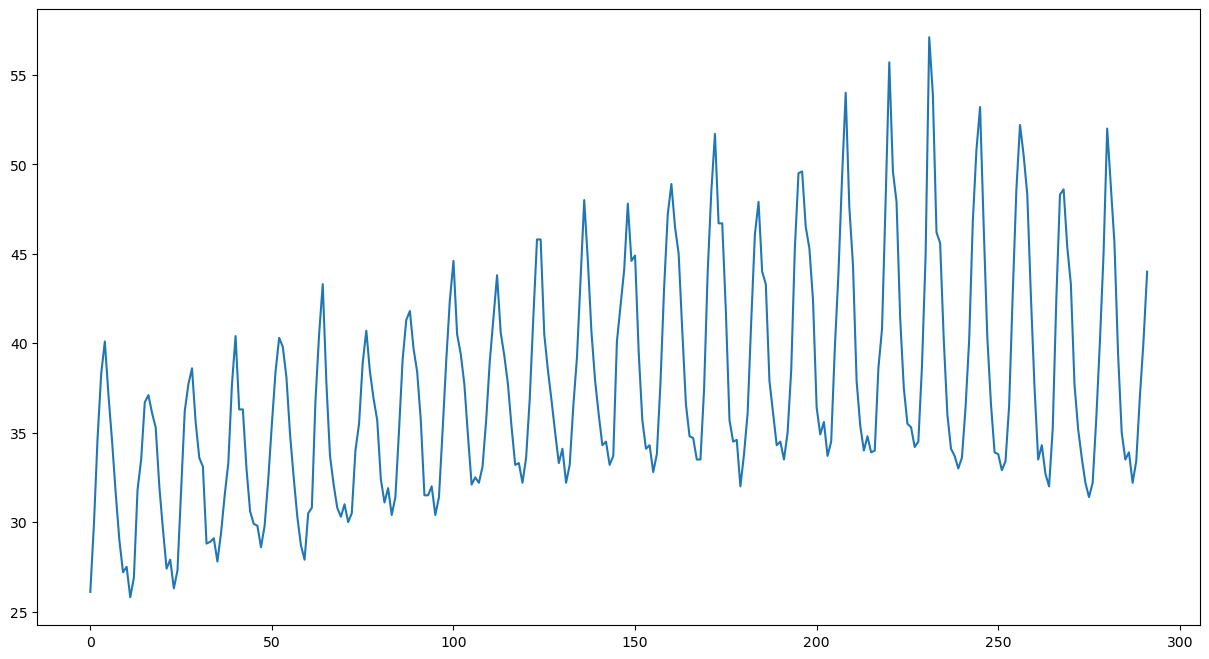

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np

# Programme principal
if __name__ == "__main__":
    # chargement des données, seule la colonne de la consommation nous intéresse
    data = np.genfromtxt(
        "exo6-electricite.csv", usecols=[1], delimiter=",", skip_header=1
    )
    xs = np.arange(data.size)

    # tracé des points correspondants
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(1, 1)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(xs, data)
    plt.savefig("exo6-data.svg")

# Fit sans estimation préalable des paramètres pertinents

paramètre finaux
a -1.9501e-04 b 0.0902 c 29.9665 A 0.0995 f -14.3277 Phi : -2172.8400


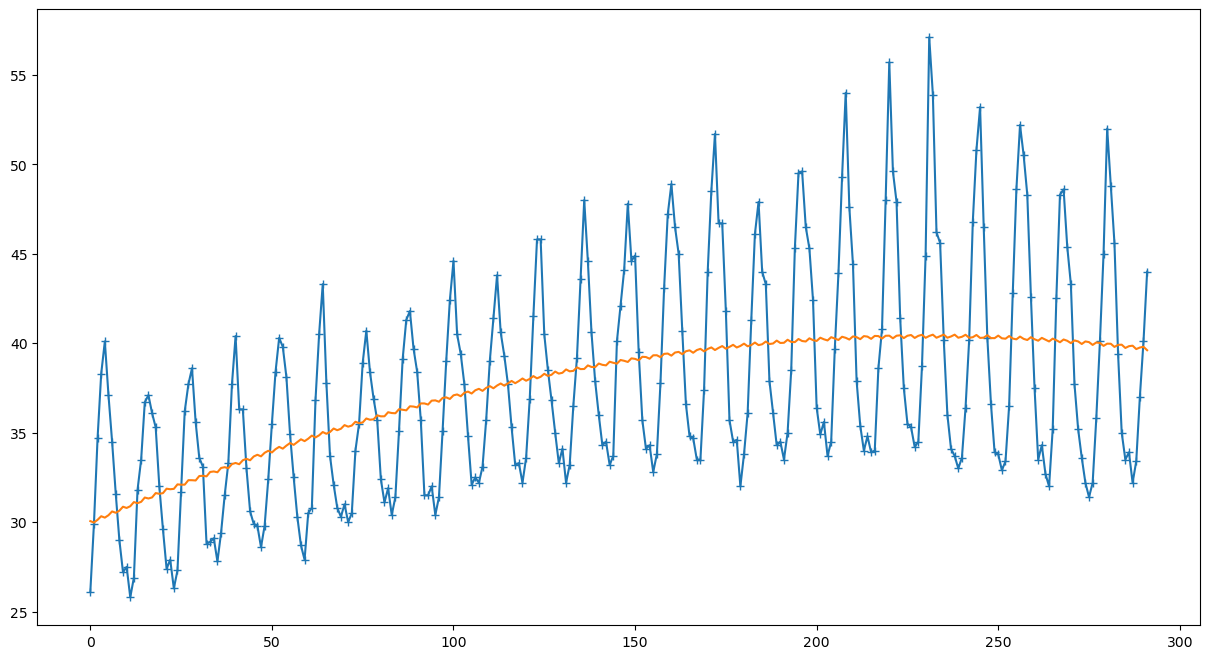

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize


def func_conso(x, a, b, c, amplitude, freq, phase):
    """
    x abscisses
    a,b,c floats pour fit parabolique
    amplitude (float)
    freq : fréquence (float)
    phase : phase (float)
    """
    # la variable x doit forcément être le premier argument de la fonction,
    # les paramètres sont placés après
    return c + b * x + a * x**2 + amplitude * np.sin(2 * np.pi * freq * x + phase)


# Programme principal
if __name__ == "__main__":
    # chargement des données, seule la colonne de la consommation nous intéresse
    data = np.genfromtxt(
        "exo6-electricite.csv", usecols=[1], delimiter=",", skip_header=1
    )
    xs = np.arange(data.size)

    # tracé des points correspondants
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(1, 1)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(xs, data, marker="+")

    ##FIT initial sans guess des paramètres
    res = optimize.curve_fit(func_conso, xs, data)
    data_mod = func_conso(xs, *res[0])
    ax1.plot(xs, data_mod)
    print("paramètre finaux")
    print("a {:.4e} b {:.4f} c {:.4f} A {:.4f} f {:.4f} Phi : {:.4f}".format(*res[0]))
    plt.show()

# Estimation des paramètres avec polyfit et fft

guess initial
a -1.9501e-04 b 0.0902 c 29.9672 A 6.0404 f 0.0822 Phi : -1.0386
paramètre finaux
a -1.9927e-04 b 0.0925 c 29.7380 A 7.1035 f 0.0832 Phi : -0.5400


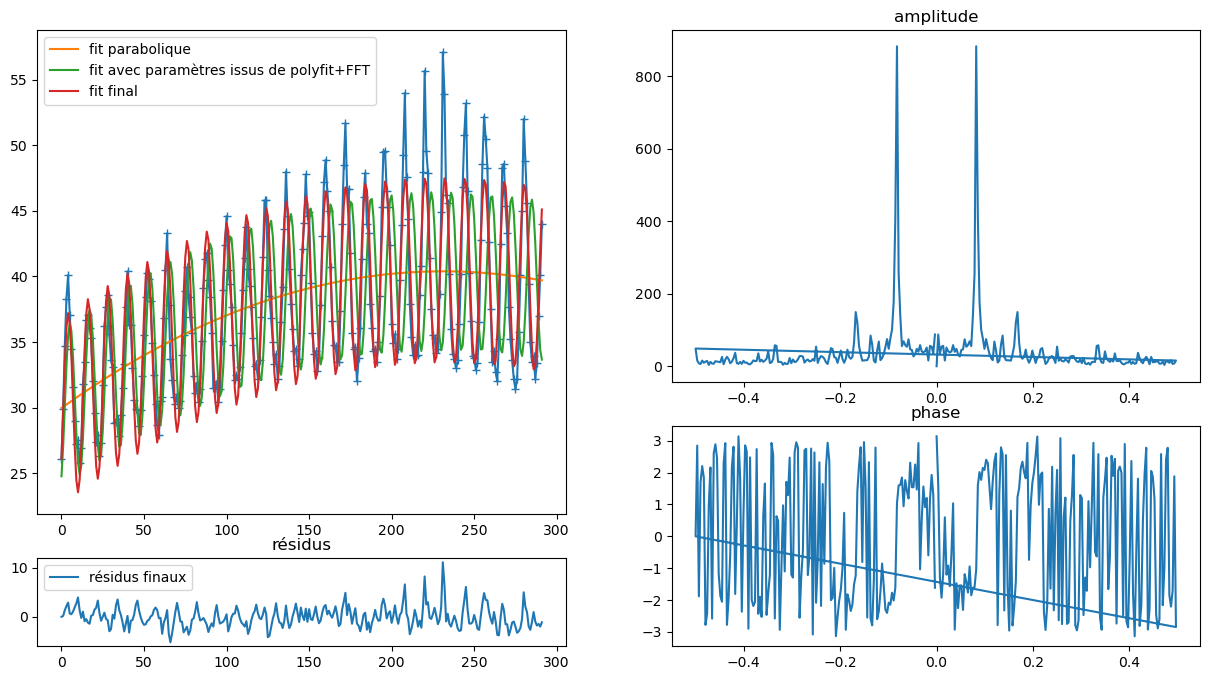

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize


def func_conso(x, a, b, c, amplitude, freq, phase):
    """
    x abscisses
    a,b,c floats pour fit parabolique
    amplitude (float)
    freq : fréquence (float)
    phase : phase (float)
    """
    # la variable x doit forcément être le premier argument de la fonction,
    # les paramètres sont placés après
    return c + b * x + a * x**2 + amplitude * np.sin(2 * np.pi * freq * x + phase)


# Programme principal
if __name__ == "__main__":
    # chargement des données, seule la colonne de la consommation nous intéresse
    data = np.genfromtxt(
        "exo6-electricite.csv", usecols=[1], delimiter=",", skip_header=1
    )
    xs, dx = np.arange(data.size), 1

    # tracé des points correspondants
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(5, 2, hspace=0.5)
    ax1 = fig.add_subplot(gs[0:4, 0])
    ax1.plot(xs, data, marker="+")

    ##Détermination du guess pour les paramètres du polynôme
    coeffs = np.polyfit(xs, data, deg=2)
    ys_para = np.polyval(coeffs, xs)
    ax1.plot(xs, ys_para, label="fit parabolique")

    ##Détermination du guess pour les paramètres fréquentiels
    sampleSize = xs.size
    fft_signal = np.fft.fft(data - ys_para)  # , norm = "ortho")
    freq_signal = np.fft.fftfreq(sampleSize, d=dx)

    indix_max_amplitude = np.argmax(fft_signal[: fft_signal.size // 2])
    freq_max = freq_signal[indix_max_amplitude]
    # Attention au facteur de normalisation égal à 2/N où N est le nombre de points
    # De plus, attention à prendre np.abs pour avoir la bonne amplitude
    amplitude_max = 2 / fft_signal.size * np.abs(fft_signal[indix_max_amplitude])
    phase = np.angle(fft_signal[indix_max_amplitude])

    # paramètre initiaux
    p0 = [*coeffs, amplitude_max, freq_max, phase]
    data_mod_0 = func_conso(xs, *p0)
    ax1.plot(xs, data_mod_0, label="fit avec paramètres issus de polyfit+FFT")

    # Plot FFT
    ax2 = fig.add_subplot(gs[0:3, 1])
    ax2.plot(freq_signal, np.abs(fft_signal))
    ax2.set_title("amplitude")
    ax3 = fig.add_subplot(gs[3:5, 1])
    ax3.plot(freq_signal, np.angle(fft_signal))
    ax3.set_title("phase")

    ##FIT final
    res = optimize.curve_fit(func_conso, xs, data, p0=p0)
    data_mod = func_conso(xs, *res[0])
    ax1.plot(xs, data_mod, label="fit final")
    ax1.legend()

    # résidus
    ax4 = fig.add_subplot(gs[4, 0])
    ax4.plot(xs, data - data_mod, label="résidus finaux")
    ax4.legend()
    ax4.set_title("résidus")
    print("guess initial")
    print("a {:.4e} b {:.4f} c {:.4f} A {:.4f} f {:.4f} Phi : {:.4f}".format(*p0))
    print("paramètre finaux")
    print("a {:.4e} b {:.4f} c {:.4f} A {:.4f} f {:.4f} Phi : {:.4f}".format(*res[0]))
    plt.savefig("exo6-data-fit-full.svg")
    plt.show()

# Estimation des paramètres à la main

paramètre finaux
a -1.9927e-04 b 0.0925 c 29.7380 A 7.1035 f 0.0832 Phi : -0.5400


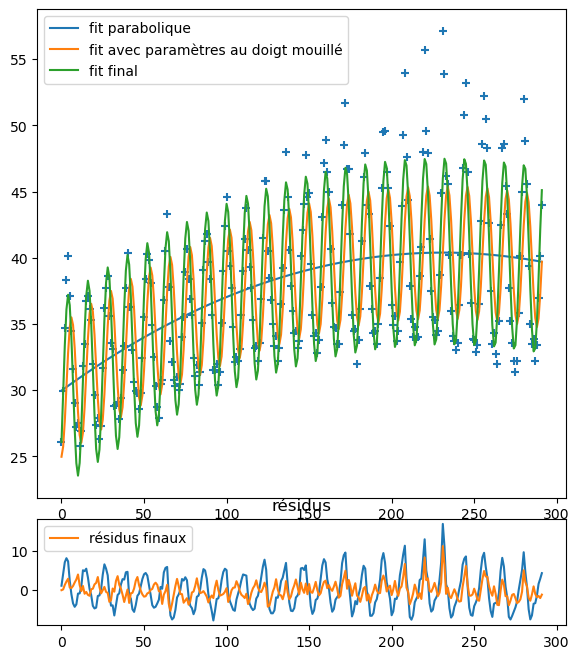

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize


def func_conso(x, a, b, c, amplitude, freq, phase):
    """
    x abscisses
    a,b,c floats pour fit parabolique
    amplitude (float)
    freq : fréquence (float)
    phase : phase (float)
    """
    # la variable x doit forcément être le premier argument de la fonction,
    # les paramètres sont placés après
    return c + b * x + a * x**2 + amplitude * np.sin(2 * np.pi * freq * x + phase)


# Programme principal
if __name__ == "__main__":
    # chargement des données, seule la colonne de la consommation nous intéresse
    data = np.genfromtxt(
        "exo6-electricite.csv", usecols=[1], delimiter=",", skip_header=1
    )
    xs, dx = np.arange(data.size), 1
    print("paramètre finaux")
    print("a {:.4e} b {:.4f} c {:.4f} A {:.4f} f {:.4f} Phi : {:.4f}".format(*res[0]))
    # tracé des points correspondants
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(5, 2)
    ax1 = fig.add_subplot(gs[0:4, 0])
    ax1.scatter(xs, data, marker="+")

    ##Détermination du guess pour les paramètres du polynôme
    coeffs = np.polyfit(xs, data, deg=2)
    ys_para = np.polyval(coeffs, xs)
    ax1.plot(xs, ys_para, label="fit parabolique")

    ##Détermination du guess pour les paramètres fréquentiels
    sampleSize = xs.size
    fft_signal = np.fft.fft(data - ys_para)  # , norm = "ortho")
    freq_signal = np.fft.fftfreq(sampleSize, d=dx)

    indix_max_amplitude = np.argmax(fft_signal[: fft_signal.size // 2])
    freq_max = freq_signal[indix_max_amplitude]
    amplitude_max = 2 / fft_signal.size * np.abs(fft_signal[indix_max_amplitude])
    phase = np.angle(fft_signal[indix_max_amplitude])

    # paramètre initiaux
    p0 = [*coeffs, 5, 1 / 12, -np.pi / 2]
    data_mod_0 = func_conso(xs, *p0)
    ax1.plot(xs, data_mod_0, label="fit avec paramètres au doigt mouillé")

    ##FIT final
    res = optimize.curve_fit(func_conso, xs, data, p0=p0)
    data_mod = func_conso(xs, *res[0])
    ax1.plot(xs, data_mod, label="fit final")
    ax1.legend()

    # résidus
    ax4 = fig.add_subplot(gs[4, 0])
    ax4.plot(xs, data - data_mod_0)
    ax4.plot(xs, data - data_mod, label="résidus finaux")
    ax4.legend()
    ax4.set_title("résidus")

    plt.show()

# Estimation avec least_squares

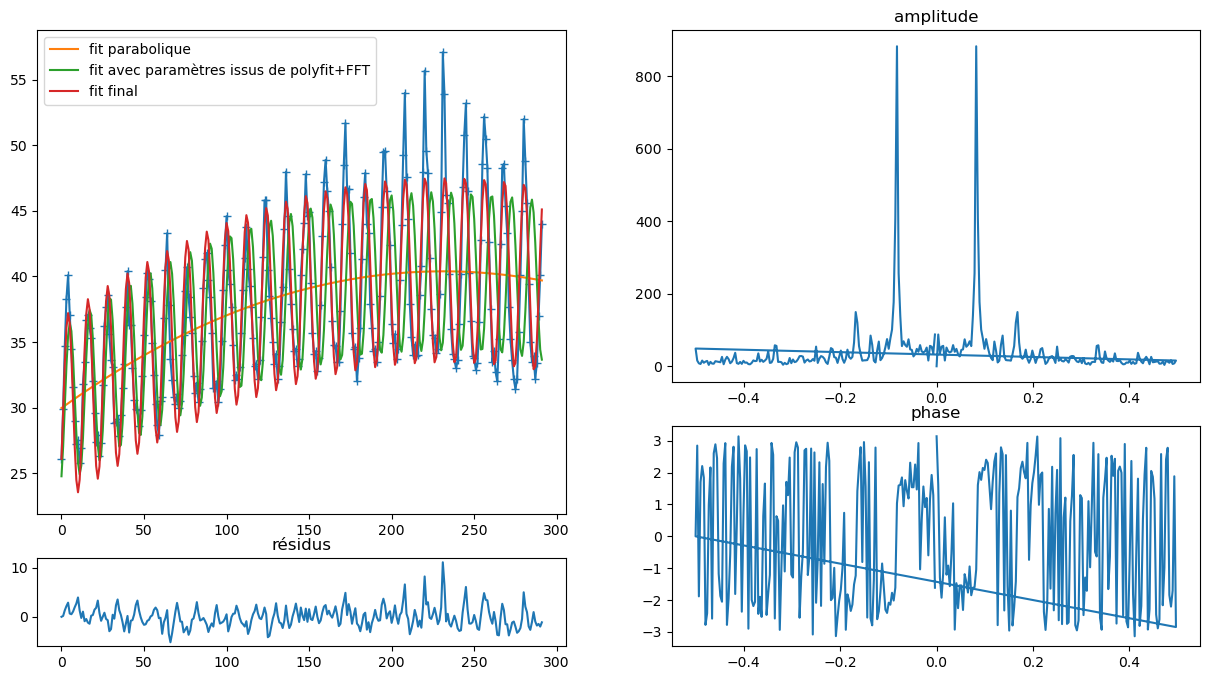

guess initial
a -1.9501e-04 b 0.0902 c 29.9672 A 6.0404 f 0.0822 Phi : -1.0386
paramètre finaux least_squares
a -1.9926e-04 b 0.0925 c 29.7380 A 7.1035 f 0.0832 Phi : -0.5400


In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize


def func_conso(x, a, b, c, amplitude, freq, phase):
    """
    x abscisses
    a,b,c floats pour fit parabolique
    amplitude (float)
    freq : fréquence (float)
    phase : phase (float)
    """
    return c + b * x + a * x**2 + amplitude * np.sin(2 * np.pi * freq * x + phase)


def func_to_minimize(p, xs, ys):
    """
    fonction à minimiser, avec les paramètres à optimiser en premier argument de la fonction
    p : coefficients à optimiser (array 1D de dimension 6)
    xs : abscisses (array 1D)
    ys : ordonnées (array 1D)
    """
    return ys - func_conso(xs, *p)


# Programme principal
if __name__ == "__main__":
    # chargement des données, seule la colonne de la consommation nous intéresse
    data = np.genfromtxt(
        "exo6-electricite.csv", usecols=[1], delimiter=",", skip_header=1
    )
    xs, dx = np.arange(data.size), 1

    # tracé des points correspondants
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(5, 2, hspace=0.5)
    ax1 = fig.add_subplot(gs[0:4, 0])
    ax1.plot(xs, data, marker="+")

    ##Détermination du guess pour les paramètres du polynôme
    coeffs = np.polyfit(xs, data, deg=2)
    ys_para = np.polyval(coeffs, xs)
    ax1.plot(xs, ys_para, label="fit parabolique")

    ##Détermination du guess pour les paramètres fréquentiels
    sampleSize = xs.size
    fft_signal = np.fft.fft(data - ys_para)  # , norm = "ortho")
    freq_signal = np.fft.fftfreq(sampleSize, d=dx)

    indix_max_amplitude = np.argmax(fft_signal[: fft_signal.size // 2])
    freq_max = freq_signal[indix_max_amplitude]
    # Attention au facteur de normalisation égal à 2/N où N est le nombre de points
    # De plus, attention à prendre np.abs pour avoir la bonne amplitude
    amplitude_max = 2 / fft_signal.size * np.abs(fft_signal[indix_max_amplitude])
    phase = np.angle(fft_signal[indix_max_amplitude])

    # paramètre initiaux
    p0 = [*coeffs, amplitude_max, freq_max, phase]
    data_mod_0 = func_conso(xs, *p0)
    ax1.plot(xs, data_mod_0, label="fit avec paramètres issus de polyfit+FFT")

    # Plot FFT
    ax2 = fig.add_subplot(gs[0:3, 1])
    ax2.plot(freq_signal, np.abs(fft_signal))
    ax2.set_title("amplitude")
    ax3 = fig.add_subplot(gs[3:5, 1])
    ax3.plot(freq_signal, np.angle(fft_signal))
    ax3.set_title("phase")

    ##FIT final
    # ici, ça ne converge pas vers la bonne fonction
    # res = optimize.least_squares(func_to_minimize, p0, args=(xs, data))
    # Ici, la mauvaise convergence viens de la mauvaise phase on peut corriger en donnant des bornes aux paramètres
    # ou alors changer la phase : 0 marche, -0.54 aussi.
    res = optimize.least_squares(
        func_to_minimize,
        p0,
        args=(xs, data),
        bounds=(
            [-np.inf, -np.inf, -np.inf, 0, 0, -np.pi],
            [np.inf, np.inf, np.inf, 10, 1, np.pi],
        ),
    )
    data_mod = func_conso(xs, *res.x)
    ax1.plot(xs, data_mod, label="fit final")
    ax1.legend()

    # résidus
    ax4 = fig.add_subplot(gs[4, 0])
    ax4.plot(xs, data - data_mod)
    ax4.set_title("résidus")

    plt.savefig("exo6-data-fit-full.svg")
    plt.show()
    print("guess initial")
    print("a {:.4e} b {:.4f} c {:.4f} A {:.4f} f {:.4f} Phi : {:.4f}".format(*p0))
    print("paramètre finaux least_squares")
    print("a {:.4e} b {:.4f} c {:.4f} A {:.4f} f {:.4f} Phi : {:.4f}".format(*res.x))

Valeurs trouvées avec curve_fit :

paramètre finaux

a -1.9927e-04 b 0.0925 c 29.7380 A 7.1035 f 0.0832 Phi : -0.5400